In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

In [2]:
ds = xr.open_dataset('redgaus.grib')
ds

<xarray.Dataset>
Dimensions:     (values: 542080)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    (values) float64 ...
    longitude   (values) float64 ...
    valid_time  datetime64[ns] ...
Dimensions without coordinates: values
Data variables:
    t2m         (values) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-09-15T10:49 GRIB to CDM+CF via cfgrib-0.9.1...

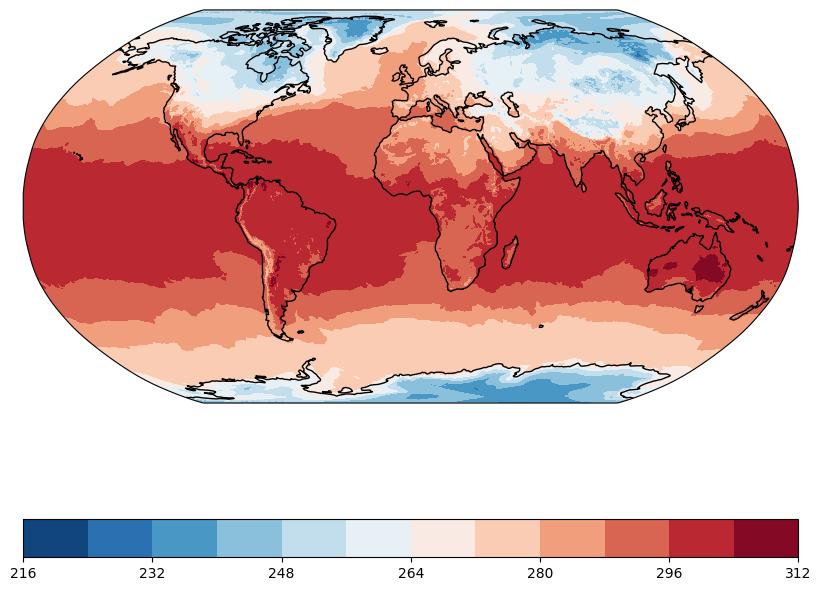

In [3]:
projection = ccrs.Robinson()

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1, projection=projection)

t2m = ds.t2m.values
xy = projection.transform_points(
    ccrs.PlateCarree(),
    ds.longitude.values, ds.latitude.values,
)
x = xy[:,0]
y = xy[:,1]

contours = ax.tricontourf(x, y, t2m, levels=14, cmap="RdBu_r", transform=projection)
ax.coastlines()

fig.colorbar(contours, location="bottom", ax=ax)

plt.show()